# Solving the n-Queens Problem using Local Search

Student Name: Michael Doherty

I have used the following AI tools: ChatGPT (for general questions about Python)

I understand that my submission needs to be my own work: MD

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the fontsize to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


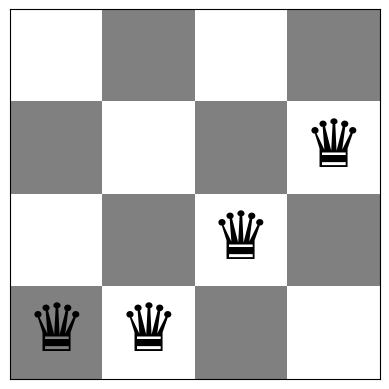

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


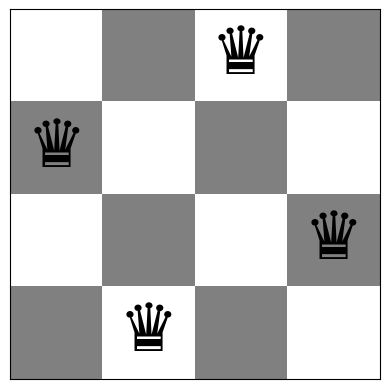

In [3]:
board = [1,3,0,2]
show_board(board)        

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-Ascent Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [12]:
from copy import deepcopy

def steepest_ascent(board):
    while True: # loop that runs until a solution is found or a local optimum is reached
        best_move = None # set best_move to none
        best_move_objective = conflicts(board) # initialize best_move_objective to the current number of conflicts
        
        for col, row in enumerate(board): # loops through every possible move
            for i in range(len(board)):
                temp_board = deepcopy(board)
                if i != row: # can't move queen to the row its already on
                    temp_board[col] = i
                    num_conflicts = conflicts(temp_board)
                    if num_conflicts < best_move_objective: # find move that reduces the number of conflicts the most
                        best_move = temp_board
                        best_move_objective = num_conflicts

        if best_move is None: # if a local optimum has been reached
            break
        
        board = best_move
        
        if conflicts(board) == 0: # if a solution has been found
            break
            
    return board

Board with 4 conflicts.


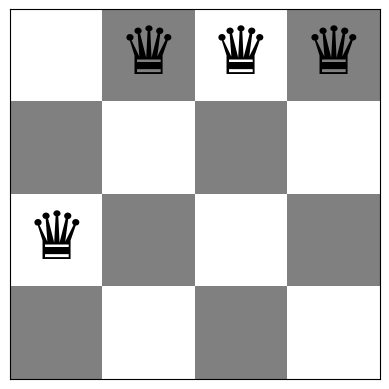

Board with 0 conflicts.


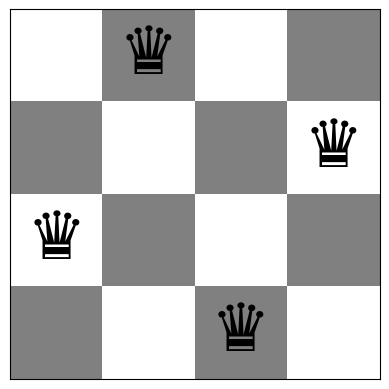

In [13]:
board = random_board(4)
show_board(board)

board = steepest_ascent(board)

show_board(board)

### Implementation Discussion
For my Steepest-Ascent Hill Climbing Search, I simply loop through every possible successor state of the current board (every board that can be achieved by moving 1 queen anywhere in its column) and choose the successor state that has the greatest decrease in the number of conflicts. For example, if the current board had 5 conflicts, and the possible successor states were:
- 7 conflicts
- 5 conflicts
- 4 conflicts
- 5 conflicts
- 2 conflicts
- 3 conflicts

then the algorithm would select the successor state with 2 conflicts (as this decreases the number of conflicts by 3, the greatest amount of all available options). This process repeats until no successor states decrease the number of conflicts (local optimum) or until the current board has 0 conflicts, at which point the current board is returned.

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [15]:
import random

def stochastic_hill_climbing(board):
    while True: # loop that runs until a solution is found or a local optimum is reached
        possible_moves = [] # holds all uphill moves
        current_board_objective = conflicts(board) # the objective function for the current board
        
        for col, row in enumerate(board): # loops through every possible move
            for i in range(len(board)):
                temp_board = deepcopy(board)
                if i != row: # can't move queen to the row its already on
                    temp_board[col] = i
                    num_conflicts = conflicts(temp_board)
                    if num_conflicts < current_board_objective: # if move is uphill
                        possible_moves.append(temp_board)

        if not possible_moves: # if a local optimum has been reached
            break
        
        board = random.choice(possible_moves) # randomly pick an uphill move
        
        if conflicts(board) == 0: # if a solution has been found
            break
            
    return board

Board with 3 conflicts.


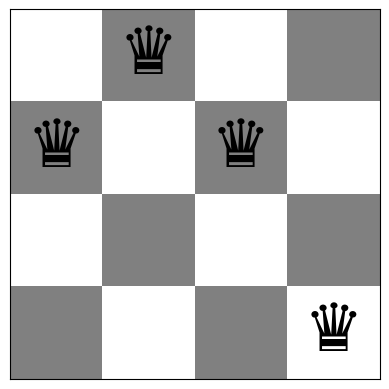

Board with 1 conflicts.


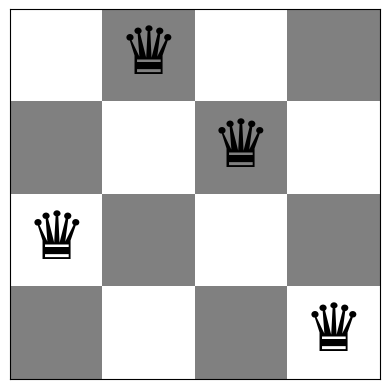

In [16]:
board = random_board(4)
show_board(board)

board = stochastic_hill_climbing(board)

show_board(board)

### Implementation Discussion
For my first Stochastic Hill Climbing Search, I simply loop through every possible successor state of the current board (every board that can be achieved by moving 1 queen anywhere in its column) and randomly select a successor state that decreases the number of conflicts. For example, if the current board had 5 conflicts, and the possible successor states were:
- 7 conflicts
- 5 conflicts
- 4 conflicts
- 5 conflicts
- 2 conflicts
- 3 conflicts

then the algorithm would randomly select a successor state from the boards with 2, 3, and 4 conflicts respectively (as all of these moves are "uphill" and decrease the number of conflicts on the board). This process repeats until no successor states decrease the number of conflicts (local optimum) or until the current board has 0 conflicts, at which point the current board is returned.

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [17]:
import secrets

def first_choice_hill_climbing(board):
    counter = 0 # counter used to detect local optima
    threshold = len(board)**2 # threshold for detecting local optima
    
    while counter < threshold: # loop that runs until a solution is found or a local optimum is reached
        current_board_objective = conflicts(board) # the objective function for the current board
        
        random_queen = secrets.randbelow(len(board)) # selects a random queen on the board
        random_row = secrets.randbelow(len(board)) # selects a random position for the queen on the board
        
        while random_row == board[random_queen]: # ensures the row isn't the row the queen is already on
            random_row = secrets.randbelow(len(board))
        
        temp_board = deepcopy(board)
        temp_board[random_queen] = random_row
        
        counter += 1 # increment the counter by 1
        
        if conflicts(temp_board) < conflicts(board): # if the successor state has less conflicts
            board = temp_board
            
            counter = 0 # reset the counter
        
            if conflicts(board) == 0: # if a solution has been found
                break
            else:
                continue
            
    return board

Board with 5 conflicts.


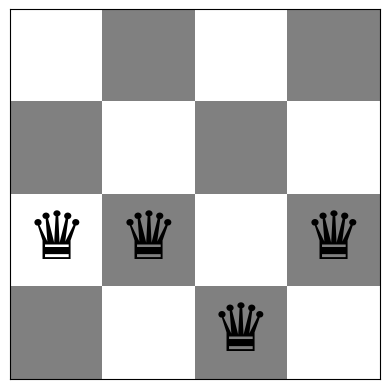

Board with 2 conflicts.


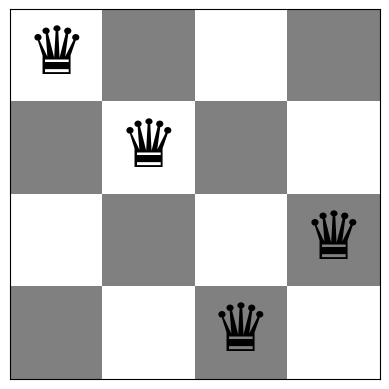

In [18]:
board = random_board(4)
show_board(board)

board = first_choice_hill_climbing(board)

show_board(board)

### Implementation Discussion
For my second Stochastic Hill Climbing Search (aka. First Choice Hill Climbing), I randomly generate a possible successor state of the current board (a board that can be achieved by moving 1 queen anywhere in its column) and make the current board the successor state if the successor state decreases the number of conflicts on the board. For example, if the current board had 5 conflicts, and the possible successor state was:
- 7 conflicts

then the move would not be made. If the next successor state was:
- 3 conflicts

then the move would be made. This process repeats until the current board has 0 conflicts or until a local optimum has been reached, at which point the current board is returned. The algorithm assumes a local optimum after it fails to find a better successor state after $x$ tries, where $x$ is the number of sqaures on the board (so for a 4x4 board, $x$ is 16, and for a 10x10 board, $x$ is 100).

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Initial board:
Board with 9 conflicts.


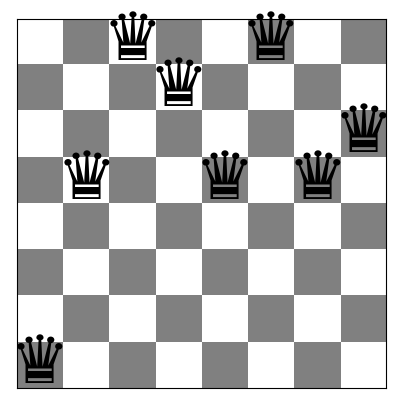

Steepest Ascent Hill Climbing: Iterations: 100, Solution:
Board with 2 conflicts.


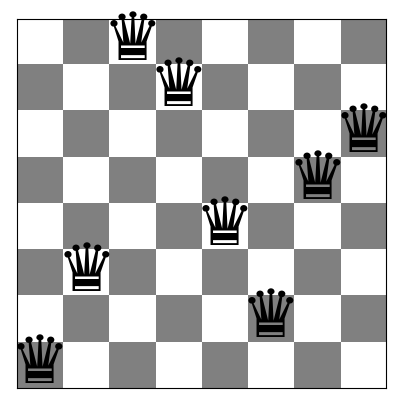

Stochastic Hill Climbing: Iterations: 11, Solution:
Board with 0 conflicts.


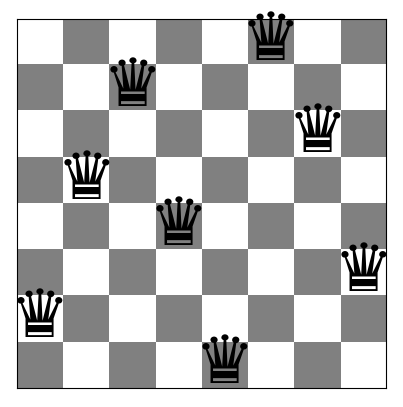

First Choice Hill Climbing: Iterations: 1, Solution:
Board with 0 conflicts.


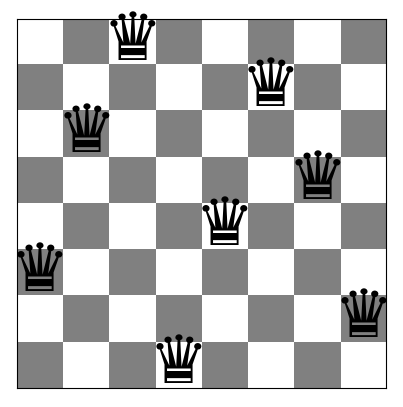

In [20]:
board = random_board(8) # random 8x8 board

solutions = [board, board, board]
num_iterations = [100, 100, 100] # default iterations to max (which is 100)

for i in range(100):
    temp_board = steepest_ascent(board)
    if conflicts(temp_board) < conflicts(solutions[0]):
        solutions[0] = temp_board
        if conflicts(temp_board) == 0:
            num_iterations[0] = i + 1
            break

for i in range(100):
    temp_board = stochastic_hill_climbing(board)
    if conflicts(temp_board) < conflicts(solutions[1]):
        solutions[1] = temp_board
        if conflicts(temp_board) == 0:
            num_iterations[1] = i + 1
            break
        
for i in range(100):
    temp_board = first_choice_hill_climbing(board)
    if conflicts(temp_board) < conflicts(solutions[2]):
        solutions[2] = temp_board
        if conflicts(temp_board) == 0:
            num_iterations[2] = i + 1
            break
                
print('Initial board:')
show_board(board)

print(f'Steepest Ascent Hill Climbing: Iterations: {num_iterations[0]}, Solution:')
show_board(solutions[0])

print(f'Stochastic Hill Climbing: Iterations: {num_iterations[1]}, Solution:')
show_board(solutions[1])

print(f'First Choice Hill Climbing: Iterations: {num_iterations[2]}, Solution:')
show_board(solutions[2])

### Discussion
As seen above, for the randomized 8x8 board that was generated, Steepest Ascent Hill Climbing failed to find an optimal solution after 100 tries. However, my first Stochastic Hill Climbing algorithm and my second Stochastic Hill Climbing algorithm (First Choice Hill Climbing) were able to find solutions (after 11 and 1 tries, respectively). Thus, it seems the random aspect of the Stochastic Hill Climbing algorithms allow them to perform better than Steepest Ascent on certain boards.

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

In [21]:
import math

# Exponentially Decaying Cooling inspired by decay schedule found at: https://mlrose.readthedocs.io/en/stable/source/decay.html
class ExponentialDecayCooling:
    def __init__(self, initial_temperature=1.0, 
                 cooling_factor=0.005, minimum_temperature=0.001):
        self.initial_temperature = initial_temperature
        self.cooling_factor = cooling_factor
        self.minimum_temperature = minimum_temperature
        
    def schedule(self, t): # cooling schedule
        temperature = self.initial_temperature * math.exp(-1 * self.cooling_factor * t)

        return temperature if temperature >= self.minimum_temperature else 0



def simulated_annealing(board, schedule):
    t = 1
        
    while True:
        T = schedule(t)
        
        if T == 0 or conflicts(board) == 0:
            return board
        
        random_queen = secrets.randbelow(len(board)) # selects a random queen on the board
        random_row = secrets.randbelow(len(board)) # selects a random position for the queen on the board
        
        while board[random_queen] == random_row: # ensures that a new position is selected for the selected queen
            random_row = secrets.randbelow(len(board))
        
        temp_board = deepcopy(board)
        temp_board[random_queen] = random_row
        
        delta_E = conflicts(board) - conflicts(temp_board)
        
        if delta_E > 0:
            board = temp_board
        else:
            probability = math.exp(delta_E / T) # probability is based on Boltzmann distribution
            
            if random.random() < probability:
                board = temp_board
                
        t += 1

Board with 20 conflicts.


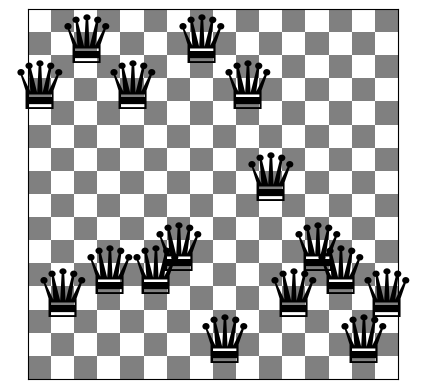

Board with 0 conflicts.


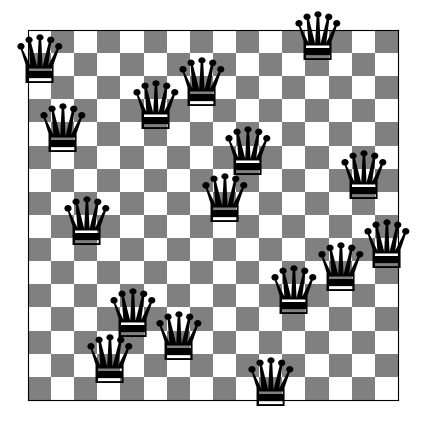

In [22]:
board = random_board(16)
show_board(board)

cooling_schedule = ExponentialDecayCooling()

board = simulated_annealing(board, cooling_schedule.schedule)

show_board(board)

### Implementation Discussion
For my Simulated Annealing algorithm, I randomly generate a possible successor state of the current board (a board that can be achieved by moving 1 queen anywhere in its column). If the successor state decreases the number of conflicts, then I set the board equal to the successor state. If the successor state increases the number of conflicts, then there is an <i>e<sup>ΔE/T</sup></i> chance that the board is set to the successor state, where <i>ΔE</i> is the change in number of conflicts (so if conflicts increase by 2, then <i>ΔE</i> is -2) and <i>T</i> is the current "temperature" for the algorithm, as determined by the annealing schedule. This process repeats until the current board has 0 conflicts or until the "temperature" reaches its minimum, at which point the current board is returned.

I decided to use an exponential decay for the annealing schedule (so the temperature decreases faster as the number of iterations decrease). I decided on this type of annealing schedule as it seemed to work better across more board sizes than a linear decay when I tested both schedules. I set the initial temperature to 1.0, the cooling factor to 0.005, and the minimum temperature to 0.001, as this achieved good results on smaller board sizes (however, it seems higher board sizes need a higher initial temperature to find the best results).

Overall, simulated annealing seems to perform better than the other local search algorithms I have implemented (as it allows for seemingly "bad" moves that may actually be necessary to find the best solution). An in-depth analysis is performed in the next section.

## Task 6: Compare Performance [10 Points]

Use runtime and objective function value to compare the algorithms.

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [23]:
from IPython.display import display, Markdown
import time
import seaborn as sns

# calculates stats and outputs them in a markdown table
def compare_algos(board_size=4, num_iterations=10):
    steepest_ascent_stats = [0, 0]
    stochastic_stats = [0, 0]
    first_choice_stats = [0, 0]
    simulated_annealing_stats = [0, 0]
    
    cooling_schedule = ExponentialDecayCooling()
    title = f'{board_size} Queens'

    for i in range(num_iterations):
        board = random_board(board_size)
        
        t0 = time.time()
        temp_board = steepest_ascent(board)
        t1 = time.time()
        steepest_ascent_stats[0] += t1 - t0
        steepest_ascent_stats[1] += conflicts(temp_board)
        
        t0 = time.time()
        temp_board = stochastic_hill_climbing(board)
        t1 = time.time()
        stochastic_stats[0] += t1 - t0
        stochastic_stats[1] += conflicts(temp_board)
        
        t0 = time.time()
        temp_board = first_choice_hill_climbing(board)
        t1 = time.time()
        first_choice_stats[0] += t1 - t0
        first_choice_stats[1] += conflicts(temp_board)
        
        t0 = time.time()
        temp_board = simulated_annealing(board, cooling_schedule.schedule)
        t1 = time.time()
        simulated_annealing_stats[0] += t1 - t0
        simulated_annealing_stats[1] += conflicts(temp_board) 
        
    
    # average the stats
    steepest_ascent_stats = [num / num_iterations for num in steepest_ascent_stats]
    stochastic_stats = [num / num_iterations for num in stochastic_stats]
    first_choice_stats = [num / num_iterations for num in first_choice_stats]
    simulated_annealing_stats = [num / num_iterations for num in simulated_annealing_stats]
    
    
    markdown_table = f'''
__{title}__

| Algorithm                     | Average Objective Function   | Average Runtime                   |
|-------------------------------|------------------------------|-----------------------------------|
| Steepest-Ascent Hill Climbing |{steepest_ascent_stats[1]}    |{format(steepest_ascent_stats[0], ".2e")}s    |
| Stochastic Hill Climbing 1    |{stochastic_stats[1]}         |{format(stochastic_stats[0], ".2e")}s         |
| Stochastic Hill Climbing 2    |{first_choice_stats[1]}       |{format(first_choice_stats[0], ".2e")}s       |
| Simulated Annealing           |{simulated_annealing_stats[1]}|{format(simulated_annealing_stats[0], ".2e")}s|
    '''    

    display(Markdown(markdown_table))
    
    return steepest_ascent_stats, stochastic_stats, first_choice_stats, simulated_annealing_stats

x = range(5)
def plot_data(data): # plots the stats found from the above function
    sns.set(style="whitegrid") # adds grid lines

    labels = ['Steepest Ascent', 'Stochastic 1', 'Stochastic 2', 'Simulated Annealing']
    
    counter = 0
    for stats in data:
        plt.plot(x, [stats[0][0], 
                     stats[1][0], 
                     stats[2][0], 
                     stats[3][0], 
                     stats[4][0]], label=labels[counter])
        counter += 1
        
    plt.xticks(x, ['4', '8', '16', '32', '64'])
    
    plt.xlabel("Number of Queens")
    plt.ylabel("Seconds")
    plt.legend()
    plt.show()
    
    counter = 0
    for stats in data:
        plt.plot(x, [stats[0][1], 
                     stats[1][1], 
                     stats[2][1], 
                     stats[3][1], 
                     stats[4][1]], label=labels[counter])
        counter += 1
        
    plt.xticks(x, ['4', '8', '16', '32', '64'])
    
    plt.xlabel("Number of Queens")
    plt.ylabel("Conflicts (Objective Function)")
    plt.legend()
    plt.show()

In [24]:
# compare board sizes of 4, 8, 16, 32, and 64
stats = [
    [0,0,0,0,0], # steepest ascent stats
    [0,0,0,0,0], # stochastic stats
    [0,0,0,0,0], # first choice stats
    [0,0,0,0,0]  # simulated annealing stats
]

stats[0][0], stats[1][0], stats[2][0], stats[3][0] = compare_algos(4, 10) # size 4 board
stats[0][1], stats[1][1], stats[2][1], stats[3][1] = compare_algos(8, 10) # size 8 board
stats[0][2], stats[1][2], stats[2][2], stats[3][2] = compare_algos(16, 10) # size 16 board
stats[0][3], stats[1][3], stats[2][3], stats[3][3] = compare_algos(32, 10) # size 32 board
stats[0][4], stats[1][4], stats[2][4], stats[3][4] = compare_algos(64, 10) # size 64 board


__4 Queens__

| Algorithm                     | Average Objective Function   | Average Runtime                   |
|-------------------------------|------------------------------|-----------------------------------|
| Steepest-Ascent Hill Climbing |0.4    |6.00e-04s    |
| Stochastic Hill Climbing 1    |0.5         |4.52e-04s         |
| Stochastic Hill Climbing 2    |0.9       |5.53e-04s       |
| Simulated Annealing           |0.0|1.55e-03s|
    


__8 Queens__

| Algorithm                     | Average Objective Function   | Average Runtime                   |
|-------------------------------|------------------------------|-----------------------------------|
| Steepest-Ascent Hill Climbing |1.2    |4.92e-03s    |
| Stochastic Hill Climbing 1    |1.4         |7.04e-03s         |
| Stochastic Hill Climbing 2    |1.9       |4.70e-03s       |
| Simulated Annealing           |0.0|2.30e-02s|
    


__16 Queens__

| Algorithm                     | Average Objective Function   | Average Runtime                   |
|-------------------------------|------------------------------|-----------------------------------|
| Steepest-Ascent Hill Climbing |2.1    |5.11e-02s    |
| Stochastic Hill Climbing 1    |2.4         |9.58e-02s         |
| Stochastic Hill Climbing 2    |2.6       |4.40e-02s       |
| Simulated Annealing           |0.7|1.21e-01s|
    


__32 Queens__

| Algorithm                     | Average Objective Function   | Average Runtime                   |
|-------------------------------|------------------------------|-----------------------------------|
| Steepest-Ascent Hill Climbing |2.7    |8.74e-01s    |
| Stochastic Hill Climbing 1    |3.5         |1.46e+00s         |
| Stochastic Hill Climbing 2    |3.7       |3.22e-01s       |
| Simulated Annealing           |2.8|2.32e-01s|
    


__64 Queens__

| Algorithm                     | Average Objective Function   | Average Runtime                   |
|-------------------------------|------------------------------|-----------------------------------|
| Steepest-Ascent Hill Climbing |4.2    |1.26e+01s    |
| Stochastic Hill Climbing 1    |4.8         |2.31e+01s         |
| Stochastic Hill Climbing 2    |4.6       |3.25e+00s       |
| Simulated Annealing           |9.0|4.66e-01s|
    

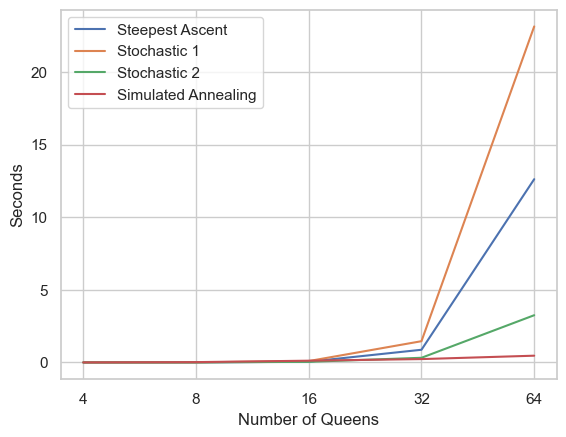

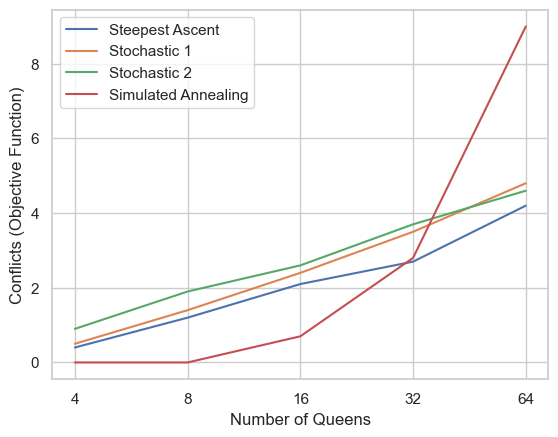

In [25]:
plot_data(stats)

### Discussion
As seen above, the algorithms scale differently as the size of the board increases.

The first Stochastic Hill Climbing Search has the worst runtime as the size of the board increases (its increase is exponential, as it increases at a higher rate as the board size increases). However, it's objective function results increase at a linear rate. Overall, it appears to be the worst local search algorithm I've implemented (mainly due to its horrible runtime).

The second Stochastic Hill Climbing Search has a good runtime on average, especially as the board size increases (which we expect, as it doesn't search all of its successor states, which can be a very high number as the board size increases). However, it almost always achieves the worst results (highest number of conflicts), so it seems to be the second worst local search algorithm I've implemented.

My Steepest Ascent algorithm also has an exponetial increase in runtime as board size increases (albeit at a slower rate than the first Stochastic algorithm); however, it generally achieved the second best results (lowest objective function) across all algorithms. Although it's runtime isn't the greatest, it appears to be the second best local search algorithm I've implemented.

Finally, my Simulated Annealing algorithm generally achieves both a good runtime and good results (particularly at low board sizes). In fact, for the 4x4 boards and 8x8 boards, the Simulated Annealing algorithm was able to always find the best solution (with 0 conflicts), and for the 16x16 board, it's average number of conflicts was 0.7 (which was much lower than the other algorithms). While its results became significantly worse as the board size increased (including having the worst average objective function for 64x64 boards), I attribute this mostly to the annealing schedule I defined. I suspect that if I increased the initial temperature for the higher board sizes (thereby giving the Simulated Annealing algorithm more time to find better solutions), than it would continue to be the best local search algorithm. Thus, I believe that the Simulated Annealing algorithm is the best local search algorithm that I've implemented.

Based off the above runtime graph, my first Stochastic algorithm and my Steepest Ascent algorithm would not be able to solve boards with a size above 500 in a reasonable amount of time; my second Stochastic algorithm and Simulated Annealing algorithm (with adjusted intial temperatures for higher board sizes) probably wouldn't be able to solve boards with a size greater than 1000 in a reasonable amount of time. Regardless, for boards with a very high size (a large number of queens), I would only want to utilize my Simulated Annealing algorithm (with a better initial temperature), as its the only local search algorithm I've implemented that I believe could find good solutions in a reasonable amount of time.

## Graduate student advanced task: Exploring other Local Moves [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Implement a few different local moves. Implement:

* moving a queen only one square at a time
* switching two columns
* more moves which move more than one queen at a time.

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [26]:
# implementations of first choice hill climbing with each of the defined local moves

def one_square(board):
    counter = 0 # counter used to detect local optima
    threshold = len(board)**2
    
    while counter < threshold: # loop that runs until a solution is found or a local optimum is reached
        current_board_objective = conflicts(board) # the objective function for the current board
        
        random_queen = secrets.randbelow(len(board)) # selects a random queen on the board
        direction = secrets.randbelow(2) # selects a random direction for the queen to move on the board
        
        temp_board = deepcopy(board)
        if direction == 0:
            if temp_board[random_queen] - 1 < 0: # if move takes queen off the board, just go the other direction
                temp_board[random_queen] += 1
            else:
                temp_board[random_queen] -= 1
        else: # if direction == 1
            if temp_board[random_queen] + 1 >= len(board): # if move takes queen off the board, just go the other direction
                temp_board[random_queen] -= 1
            else:
                temp_board[random_queen] += 1
        
        counter += 1 # increment the counter by 1
        
        if conflicts(temp_board) < conflicts(board):
            board = temp_board
            
            counter = 0 # reset the counter
        
            if conflicts(board) == 0: # if a solution has been found
                break
            else:
                continue
            
    return board

def switch_columns(board):
    counter = 0 # counter used to detect local optima
    threshold = len(board)**2
    
    while counter < threshold: # loop that runs until a solution is found or a local optimum is reached
        current_board_objective = conflicts(board) # the objective function for the current board
        
        random_queen_1 = secrets.randbelow(len(board)) # selects a random queen on the board
        random_queen_2 = secrets.randbelow(len(board)) # selects a second random queen on the board
        
        while random_queen_2 == random_queen_1: # ensures that second queen isn't same as the first
            random_queen_2 = secrets.randbelow(len(board))
        
        temp_board = deepcopy(board)
        temp_board[random_queen_1], temp_board[random_queen_2] = temp_board[random_queen_2], temp_board[random_queen_1]
        
        counter += 1 # increment the counter by 1
        
        if conflicts(temp_board) < conflicts(board):
            board = temp_board
            
            counter = 0 # reset the counter
        
            if conflicts(board) == 0: # if a solution has been found
                break
            else:
                continue
            
    return board

def multiple_moves(board):
    counter = 0 # counter used to detect local optima
    threshold = len(board)**2
    
    while counter < threshold: # loop that runs until a solution is found or a local optimum is reached
        current_board_objective = conflicts(board) # the objective function for the current board
        
        random_queen_1 = secrets.randbelow(len(board)) # selects a random queen on the board
        random_row_1 = secrets.randbelow(len(board)) # selects a random position for the queen on the board
        
        random_queen_2 = secrets.randbelow(len(board)) # selects a second random queen on the board
        random_row_2 = secrets.randbelow(len(board)) # selects a random position for the second queen on the board
        
        while random_queen_2 == random_queen_1: # ensures that second queen isn't same as the first
            random_queen_2 = secrets.randbelow(len(board))
        
        temp_board = deepcopy(board)
        temp_board[random_queen_1] = random_row_1
        temp_board[random_queen_2] = random_row_2
        
        counter += 1 # increment the counter by 1
        
        if conflicts(temp_board) < conflicts(board):
            board = temp_board
            
            counter = 0 # reset the counter
        
            if conflicts(board) == 0: # if a solution has been found
                break
            else:
                continue
            
    return board

In [27]:
def compare_local_moves(board_size=8, num_iterations=10):
    regular_stats = [0, 0]
    one_square_stats = [0, 0]
    switch_columns_stats = [0, 0]
    multiple_moves_stats = [0, 0]
    
    title = f'{board_size} Queens'

    for i in range(num_iterations):
        board = random_board(board_size)
        
        t0 = time.time()
        temp_board = first_choice_hill_climbing(board)
        t1 = time.time()
        regular_stats[0] += t1 - t0
        regular_stats[1] += conflicts(temp_board)
        
        t0 = time.time()
        temp_board = one_square(board)
        t1 = time.time()
        one_square_stats[0] += t1 - t0
        one_square_stats[1] += conflicts(temp_board)
        
        t0 = time.time()
        temp_board = switch_columns(board)
        t1 = time.time()
        switch_columns_stats[0] += t1 - t0
        switch_columns_stats[1] += conflicts(temp_board)
        
        t0 = time.time()
        temp_board = multiple_moves(board)
        t1 = time.time()
        multiple_moves_stats[0] += t1 - t0
        multiple_moves_stats[1] += conflicts(temp_board) 
        
    
    # average the stats
    regular_stats = [num / num_iterations for num in regular_stats]
    one_square_stats = [num / num_iterations for num in one_square_stats]
    switch_columns_stats = [num / num_iterations for num in switch_columns_stats]
    multiple_moves_stats = [num / num_iterations for num in multiple_moves_stats]
    
    
    markdown_table = f'''
__{title}__

| Local Move Type     |Average Objective Function| Average Runtime                   |
|---------------------|--------------------------|-----------------------------------|
| Regular             |{regular_stats[1]}        |{format(regular_stats[0], ".2e")}s    |
| Move One Square     |{one_square_stats[1]}     |{format(one_square_stats[0], ".2e")}s         |
| Switch Two Columns  |{switch_columns_stats[1]} |{format(switch_columns_stats[0], ".2e")}s       |
| Make Multiple Moves |{multiple_moves_stats[1]} |{format(multiple_moves_stats[0], ".2e")}s|
    '''    

    display(Markdown(markdown_table))
    
    return [regular_stats, one_square_stats, switch_columns_stats, multiple_moves_stats]

x = range(4)
def plot_data_2(data):
    sns.set(style="whitegrid") # adds grid lines

    labels = ['Regular', 'Move One Square', 'Switch Two Columns', 'Make Multiple Moves']
        
    plt.scatter(x, [data[0][0], 
                 data[1][0], 
                 data[2][0], 
                 data[3][0]])
        
    plt.xticks(x, labels)
    
    plt.title("8-Queens Problem with Different Types of Moves")
    plt.xlabel("Local Move Type")
    plt.ylabel("Seconds")
    plt.show()
    
    plt.scatter(x, [data[0][1], 
                 data[1][1], 
                 data[2][1], 
                 data[3][1]])
        
    plt.xticks(x, labels)
        
    plt.title("8-Queens Problem with Different Types of Moves")
    plt.xlabel("Local Move Type")
    plt.ylabel("Conflicts (Objective Function)")
    plt.show()


__8 Queens__

| Local Move Type     |Average Objective Function| Average Runtime                   |
|---------------------|--------------------------|-----------------------------------|
| Regular             |1.4        |6.62e-03s    |
| Move One Square     |3.0     |5.05e-03s         |
| Switch Two Columns  |4.1 |3.64e-03s       |
| Make Multiple Moves |2.0 |5.43e-03s|
    

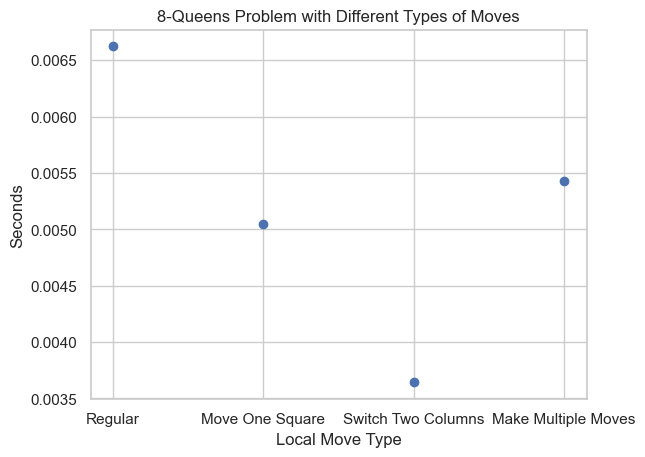

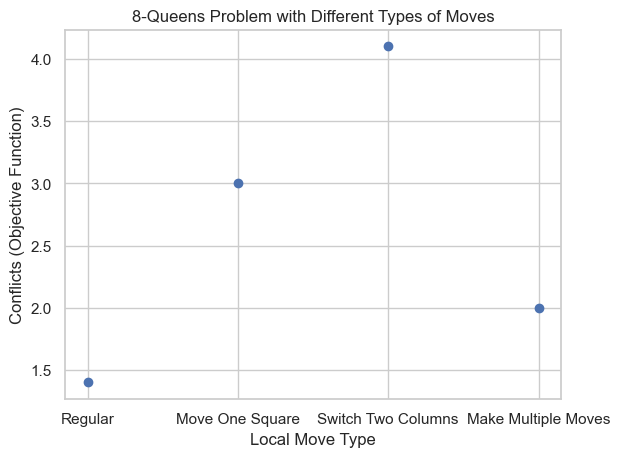

In [31]:
data = compare_local_moves()
plot_data_2(data)

### Implementation
I implemented each of the local moves as their own algorithms, each one based off the second Stochastic Hill Climbing algorithm I implemented above. For making multiple moves at the same time, I simply moved **only** 2 queens simultaneously to get a successor state.

### Discussion
As seen above, the Stochastic Hill Climbing algorithm is fastest when the local move is simply swapping 2 columns on the board; however, this also results in the worst performance on average (the highest number of average conflicts for a returned board). Conversely, making only one move (our regular local move that we used throughout this assignment) takes the longest, but it has the best results (an average of 1.4 conflicts per board, which is less than the other local moves). Moving one square is pretty fast, but it gives the second worst results. Making multiple moves is faster than only making one move, but it has a slightly worse result on average. Thus, based off the data, for the 8-queens problem, the best local moves are (in order from best to worst):
1. Moving a single queen within its column
2. Moving multiple queens within their columns
3. Moving a single queen by 1 space at a time
4. Swapping columns on the board

Based on the above results, I suspect that a local move that combines moving multiple queens and moving a single queen would have even better results. For example, a local move that finds a move for Queen A and a move for Queen B, considers the successor states where you move only Queen A, move only Queen B, and move both queens, and then randomly chooses among any of the successor states that are uphill could result in better results (fewer conflicts).

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

My Genetic Algorithm for the n-Queens problem would look like the following pseudo-code:

```
def genetic_algorithm(board):
    while (true):
        chromosomes = get_random_board_arrangements # get 16 randomized arrangements of the board

        for chromosome in chromosomes:
            # store the number of conflicts each chromosome has

        sort(chromosomes) # sort the chromosomes by the number of conflicts they have
        
        select(chromosomes) # select half of the chromosomes, with an 80% chance to take the chromosome with the next lowest number of conflicts, and a 20% chance to take a random chromosome

        produce_offspring(chromosomes) # pair chromosomes up, and make a "child" by placing queens for the new chromosome based on the average row value for each column; do this twice to get 8 children chromosomes

        mutate(chromosomes) # for 2 of the new chromosomes, randomly move 1 of the queens with a 20% probability (80% of the time we do nothing)
        
        look_for_solution(chromosomes) # for all child chromosomes, see if any have 0 conflicts; if so, return chromosome
        
        if no_solution:
            repeat loop until optimal solution found
```